# A cryptographic protocol to train classification models with federated learning and homomorphic encryption

In [1]:
from sklearn.datasets import load_digits

from simulation.simulation import Simulation

# Testing

In [2]:
HYPERPARAMS = {
    'n_clients': 3,
    'key_length': 1024,
    'architecture': {
        'n_features': 64, 
        'n_classes': 10,
        'hidden_layers_size': (32,16),
        'activations': ('tanh','tanh')
    },
    'train': {
        'learning_rate': 0.01,
        'epochs': 5
    },
    'test': {
        'test_size': 0.1
    }
}

In [3]:
dataset = load_digits()

X, y = dataset.data, dataset.target

In [4]:
simulation = Simulation(X, y, **HYPERPARAMS)
print(simulation)
simulation.print_metadata()

Simulación para 3 clientes

        Layers size: (64, 32, 16, 10)
        Activations: ('tanh', 'tanh', 'softmax')
        Trainable parameters: 2778
        


Running local training for 5 epochs...

Metrics that each client gets on Test Set by training only on own local data:

|    | name     |   accuracy |    loss |   precision |    recall |   roc-auc |
|---:|:---------|-----------:|--------:|------------:|----------:|----------:|
|  0 | Client 1 |  0.0777778 | 2.39848 |   0.0933982 | 0.0777778 |  0.489691 |
|  1 | Client 2 |  0.133333  | 2.28037 |   0.173014  | 0.133333  |  0.589645 |
|  2 | Client 3 |  0.144444  | 2.4051  |   0.128799  | 0.144444  |  0.497594 |


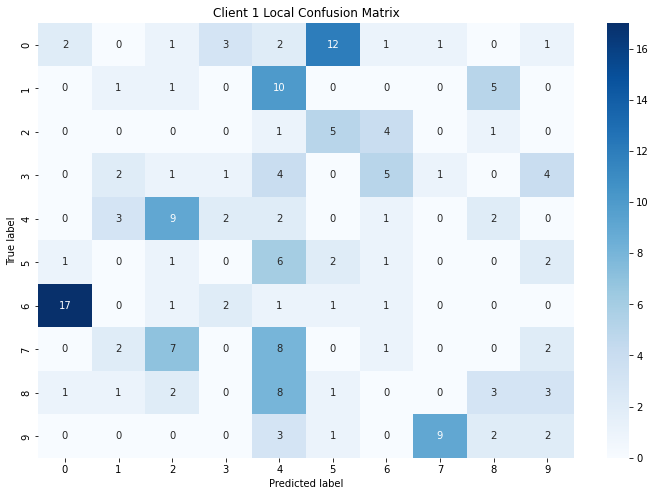

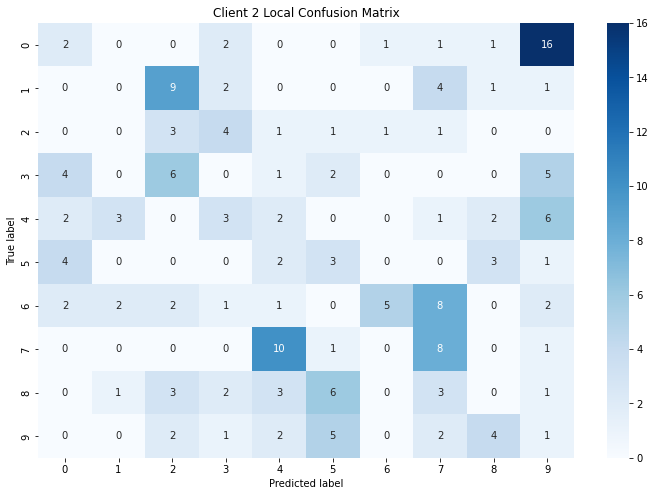

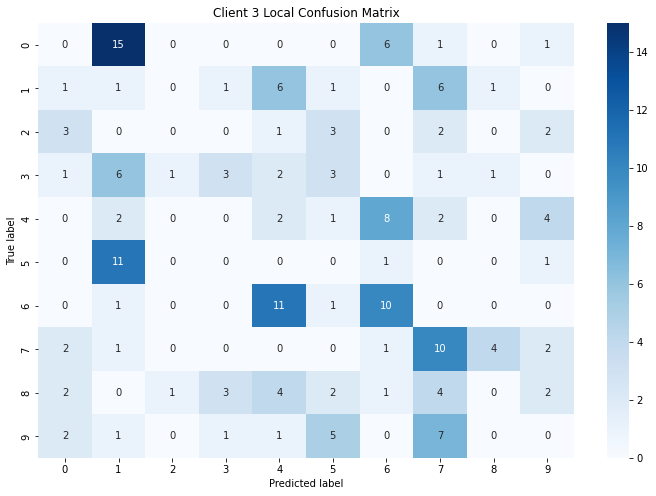

In [5]:
simulation.run_local(plot=True)


Running distributed gradient aggregation for 5 epochs...

- Epoch 1 / 5 : Epoch Time: 159.31s, Total Time: 159.31s
- Epoch 2 / 5 : Epoch Time: 157.75s, Total Time: 317.06s
- Epoch 3 / 5 : Epoch Time: 157.93s, Total Time: 474.99s
- Epoch 4 / 5 : Epoch Time: 157.82s, Total Time: 632.80s
- Epoch 5 / 5 : Epoch Time: 147.01s, Total Time: 779.82s

Metrics that each client gets on Test Set by training with Federated Learning Protocol:

|    | name     |   accuracy |    loss |   precision |    recall |   roc-auc |
|---:|:---------|-----------:|--------:|------------:|----------:|----------:|
|  0 | Client 1 |  0.0777778 | 2.38648 |    0.094637 | 0.0777778 |  0.498263 |
|  1 | Client 2 |  0.138889  | 2.28103 |    0.176208 | 0.138889  |  0.588634 |
|  2 | Client 3 |  0.144444  | 2.38971 |    0.132886 | 0.144444  |  0.506497 |


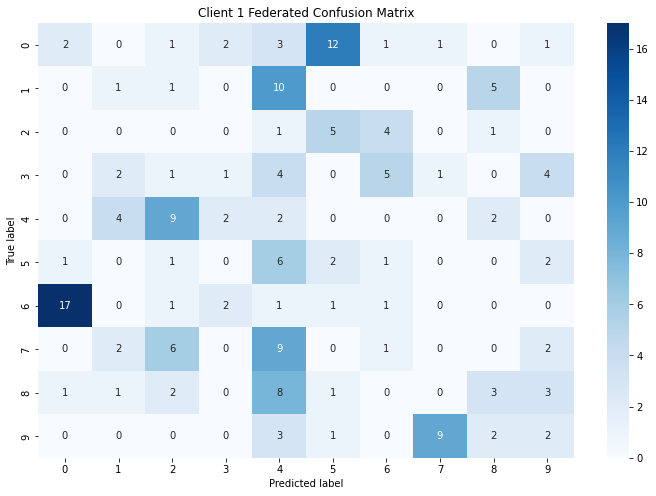

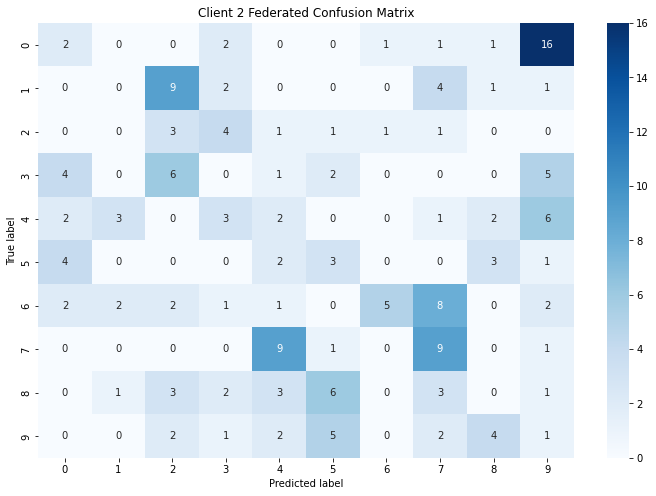

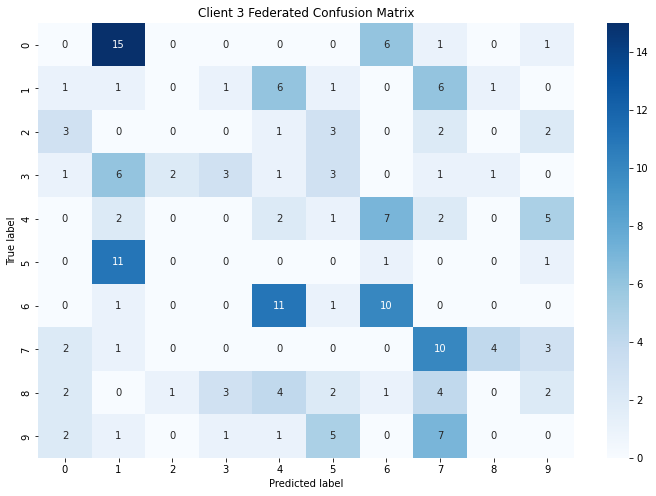

In [6]:
simulation.run_federated(plot=True)